# Gráfico

In [925]:
library("fredr")
library("tidyverse")
library("scales")
library("vroom")
library("ggplot2")
library("dplyr")
library("scales")
library("zoo")
library("gapminder")
library("utf8")
library("gridExtra")
library("socviz")
library("ggrepel")
Sys.setlocale("LC_ALL", "pt_br.utf-8")
library("lubridate")
library("readr")

[1] "pt_br.utf-8/pt_br.utf-8/pt_br.utf-8/C/pt_br.utf-8/C"

In [926]:
# obs:
# mudança na escala feita da seguinte maneira:
options(repr.plot.width=15, repr.plot.height=8)

In [927]:
runners_data = read.csv("Runners.csv")
glimpse(runners_data)

Rows: 18,244
Columns: 10
$ Rank          <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 9, 9, 12, 13, 14, 15, 16, 17,…
$ Time          <chr> "00:01:40.910000", "00:01:41.010000", "00:01:41.090000",…
$ Name          <chr> "David Rudisha", "David Rudisha", "David Rudisha", "Wils…
$ Country       <chr> "KEN", "KEN", "KEN", "DEN", "DEN", "KEN", "KEN", "KEN", …
$ Date.of.Birth <chr> "1988-12-17", "1988-12-17", "1988-12-17", "1970-12-12", …
$ Place         <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,…
$ City          <chr> "London", "Rieti", "Berlin", "Köln", "Zürich", "Rieti", …
$ Date          <chr> "2012-09-08", "2010-08-29", "2010-08-22", "1997-08-24", …
$ Gender        <chr> "Men", "Men", "Men", "Men", "Men", "Men", "Men", "Men", …
$ Event         <chr> "800 m", "800 m", "800 m", "800 m", "800 m", "800 m", "8…


In [928]:
runners_data$Date <- as.POSIXct(runners_data$Date, format = "%Y-%m-%d")
head(runners_data)

,Rank,Time,Name,Country,Date.of.Birth,Place,City,Date,Gender,Event
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dttm>,<chr>,<chr>
1,1,00:01:40.910000,David Rudisha,KEN,1988-12-17,1,London,2012-09-08,Men,800 m
2,2,00:01:41.010000,David Rudisha,KEN,1988-12-17,1,Rieti,2010-08-29,Men,800 m
3,3,00:01:41.090000,David Rudisha,KEN,1988-12-17,1,Berlin,2010-08-22,Men,800 m
4,4,00:01:41.110000,Wilson Kipketer,DEN,1970-12-12,1,Köln,1997-08-24,Men,800 m
5,5,00:01:41.240000,Wilson Kipketer,DEN,1970-12-12,1,Zürich,1997-08-13,Men,800 m
6,6,00:01:41.330000,David Rudisha,KEN,1988-12-17,1,Rieti,2011-10-09,Men,800 m


In [929]:
runners_data <- runners_data |>
mutate(
    Age = year(runners_data$Date) - year(runners_data$Date.of.Birth	)
)

# Performance entre sexo

Vamos começar analisando a performace entre homens e mulhes

In [930]:
runners_women <- runners_data |>
filter(Gender == "Women")

runners_men <- runners_data |>
filter(Gender == "Men")

runners_men$Year <- year(runners_men$Date)
runners_women$Year <- year(runners_women$Date)
runners_data$Year <- year(runners_data$Date)

In [931]:
glimpse(runners_data)

Rows: 18,244
Columns: 12
$ Rank          <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 9, 9, 12, 13, 14, 15, 16, 17,…
$ Time          <chr> "00:01:40.910000", "00:01:41.010000", "00:01:41.090000",…
$ Name          <chr> "David Rudisha", "David Rudisha", "David Rudisha", "Wils…
$ Country       <chr> "KEN", "KEN", "KEN", "DEN", "DEN", "KEN", "KEN", "KEN", …
$ Date.of.Birth <chr> "1988-12-17", "1988-12-17", "1988-12-17", "1970-12-12", …
$ Place         <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,…
$ City          <chr> "London", "Rieti", "Berlin", "Köln", "Zürich", "Rieti", …
$ Date          <dttm> 2012-09-08, 2010-08-29, 2010-08-22, 1997-08-24, 1997-08…
$ Gender        <chr> "Men", "Men", "Men", "Men", "Men", "Men", "Men", "Men", …
$ Event         <chr> "800 m", "800 m", "800 m", "800 m", "800 m", "800 m", "8…
$ Age           <dbl> 24, 22, 22, 27, 27, 23, 22, 24, 25, 27, 18, 24, 21, 26, …
$ Year          <dbl> 2012, 2010, 2010, 1997, 1997, 2011, 2010, 2012, 1981, 19…


In [932]:
performance_runners_men <- runners_men |>
group_by(Year) |>
filter(Year <= 2016) |>
summarise(
    Gold_medals = sum(Place == 1,na.rm = TRUE),
    Silver_medals = sum(Place == 2,na.rm = TRUE),
    Bronze_medals = sum(Place == 3,na.rm = TRUE),
    Total = Gold_medals + Silver_medals + Bronze_medals
)
glimpse(performance_runners_men)

Rows: 52
Columns: 5
$ Year          <dbl> 1962, 1965, 1966, 1967, 1968, 1969, 1971, 1972, 1973, 19…
$ Gold_medals   <int> 1, 1, 1, 2, 7, 1, 2, 5, 3, 10, 7, 7, 16, 14, 14, 15, 18,…
$ Silver_medals <int> 0, 0, 0, 0, 4, 0, 0, 2, 0, 1, 0, 3, 4, 2, 0, 3, 1, 8, 7,…
$ Bronze_medals <int> 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 2, 4,…
$ Total         <int> 1, 1, 1, 2, 14, 1, 2, 7, 3, 12, 7, 11, 21, 17, 14, 19, 1…


In [933]:
performance_runners_women <- runners_women |>
group_by(Year) |>
filter(Year <= 2016) |>
summarise(
    Gold_medals = sum(Place == 1,na.rm = TRUE),
    Silver_medals = sum(Place == 2,na.rm = TRUE),
    Bronze_medals = sum(Place == 3,na.rm = TRUE),
    Total = Gold_medals + Silver_medals + Bronze_medals
)
glimpse(performance_runners_women)

Rows: 45
Columns: 5
$ Year          <dbl> 1964, 1972, 1973, 1974, 1976, 1977, 1978, 1979, 1980, 19…
$ Gold_medals   <int> 1, 2, 3, 8, 28, 12, 22, 47, 59, 49, 59, 62, 119, 78, 90,…
$ Silver_medals <int> 0, 1, 0, 0, 13, 2, 8, 13, 27, 15, 18, 26, 54, 33, 30, 30…
$ Bronze_medals <int> 0, 0, 0, 0, 7, 0, 5, 7, 16, 8, 9, 12, 25, 11, 8, 14, 26,…
$ Total         <int> 1, 3, 3, 8, 48, 14, 35, 67, 102, 72, 86, 100, 198, 122, …


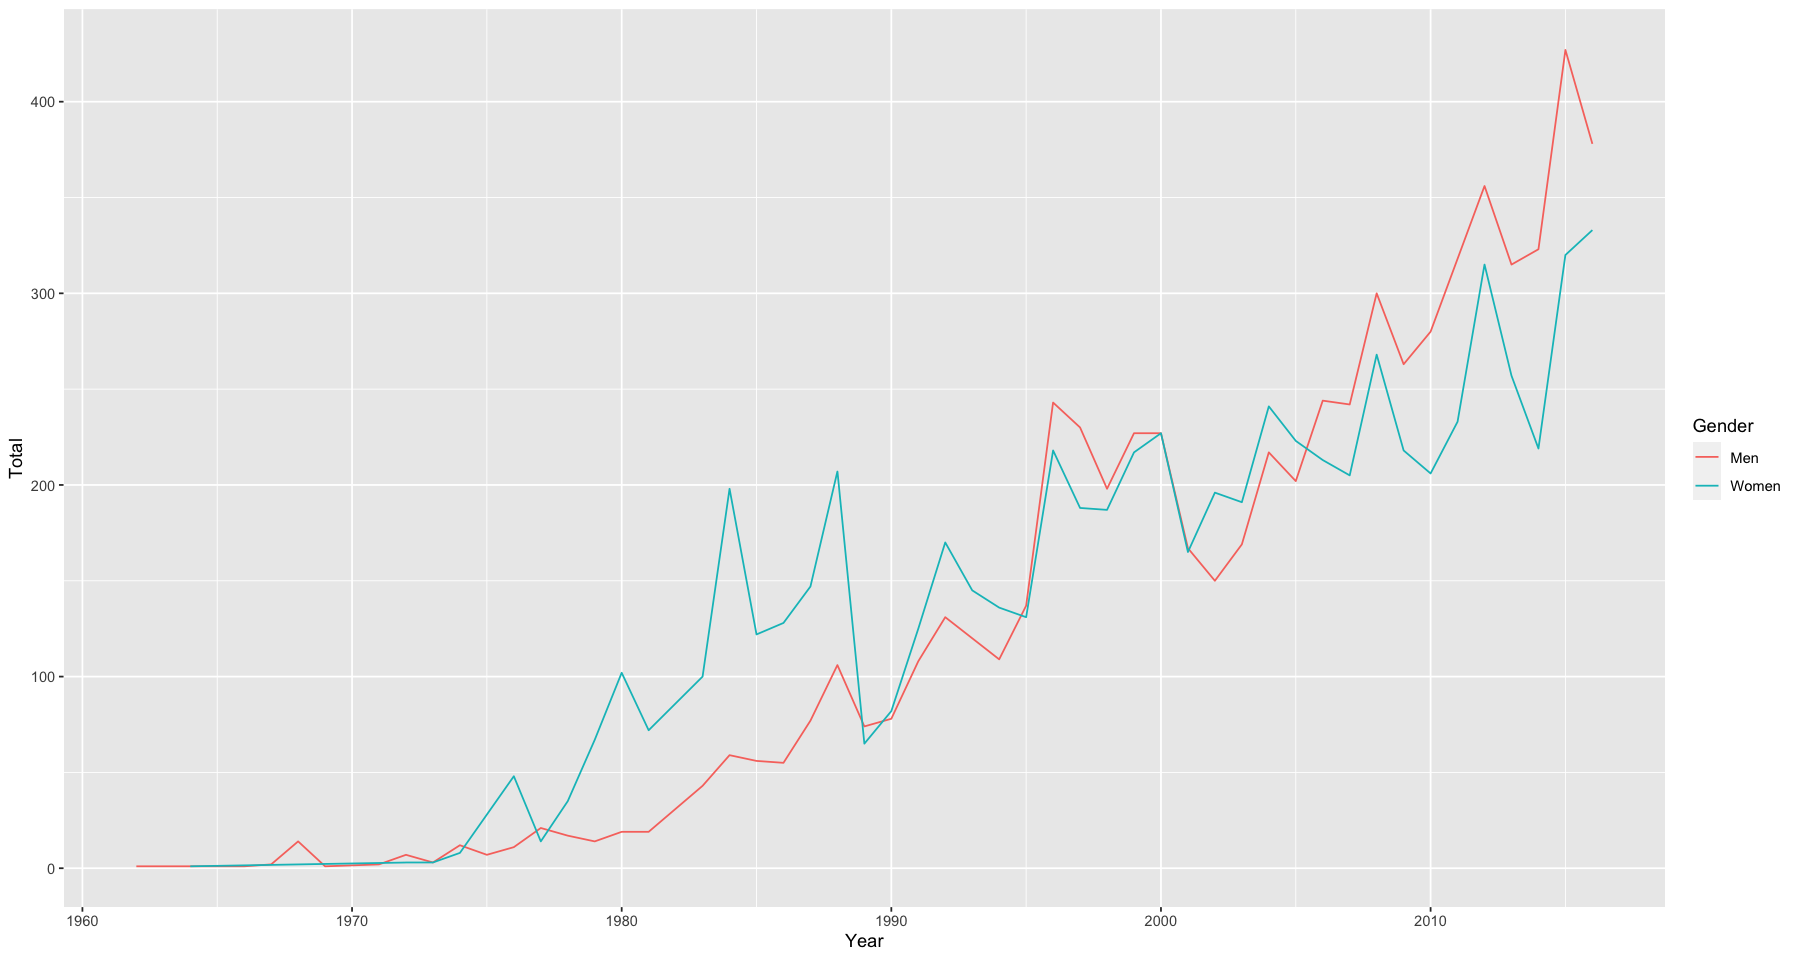

In [934]:
performance_runners_men$Gender <- "Men"
performance_runners_women$Gender <- "Women"
combined_data_performance_runners <- rbind(performance_runners_men, performance_runners_women)
ggplot(data = combined_data_performance_runners, aes(x = Year, y = Total, color = Gender)) + geom_line() + scale_x_continuous(breaks = seq(1960, 2015, 10))

In [935]:
gold_medal_plot <- ggplot(data = combined_data_performance_runners, mapping = aes(y = Gold_medals, x  = Year,color = Gender)) + geom_line()

In [936]:
silver_medal_plot <- ggplot(data = combined_data_performance_runners, mapping = aes(y = Silver_medals, x  = Year,color = Gender)) + geom_line()

In [937]:
bronze_medal_plot <- ggplot(data = combined_data_performance_runners, mapping = aes(y = Silver_medals, x  = Year,color = Gender)) + geom_line()

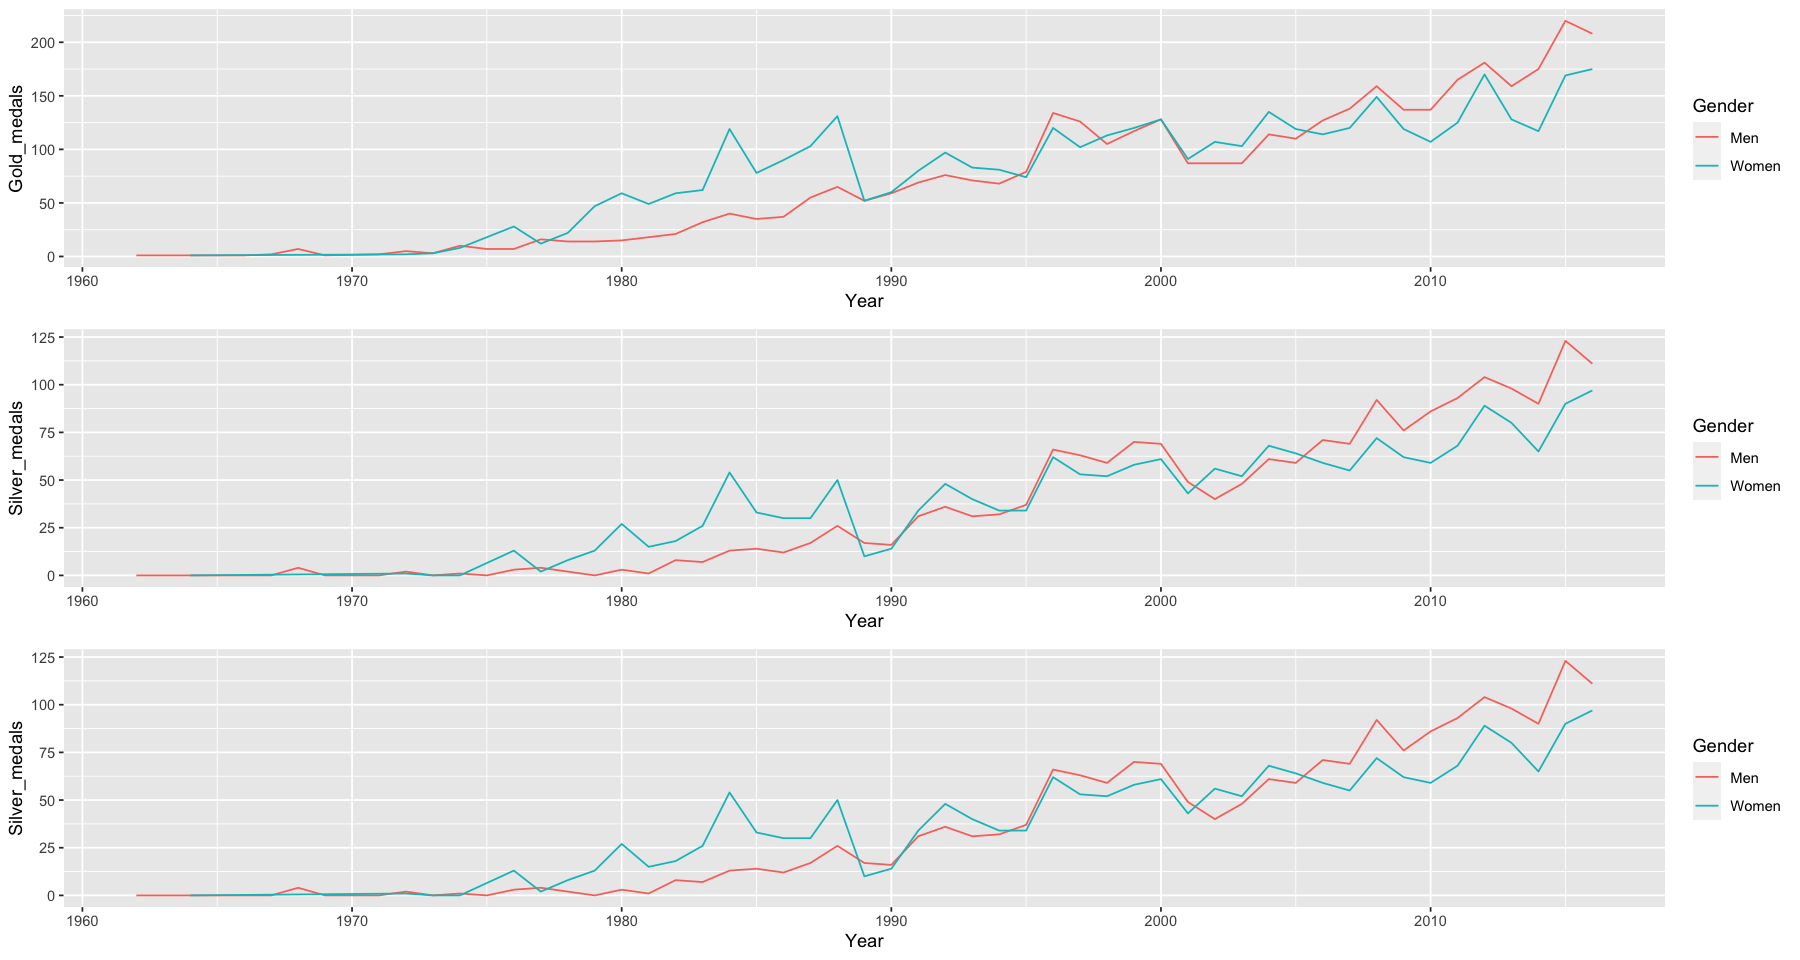

In [938]:
grid.arrange(gold_medal_plot,silver_medal_plot,bronze_medal_plot)

## Performance por país 

In [939]:
performance_country <- runners_data |>
filter(Place == 1 | Place == 2 | Place == 3) |>
count(Country,sort = TRUE)

performance_country_filtered <- head(performance_country$Country,9)
performance_country_filtered <- as.list(performance_country_filtered)

In [940]:
countries_performance_per_year <- runners_data |>
group_by(Country,Year) |>
filter(Place == 1 | Place == 2 | Place == 3, Year <= 2016) |>
count(Country,sort =  TRUE) |>
rename(total = n)  

top_countries_performance_per_year <- countries_performance_per_year |> filter(Country %in% performance_country_filtered)


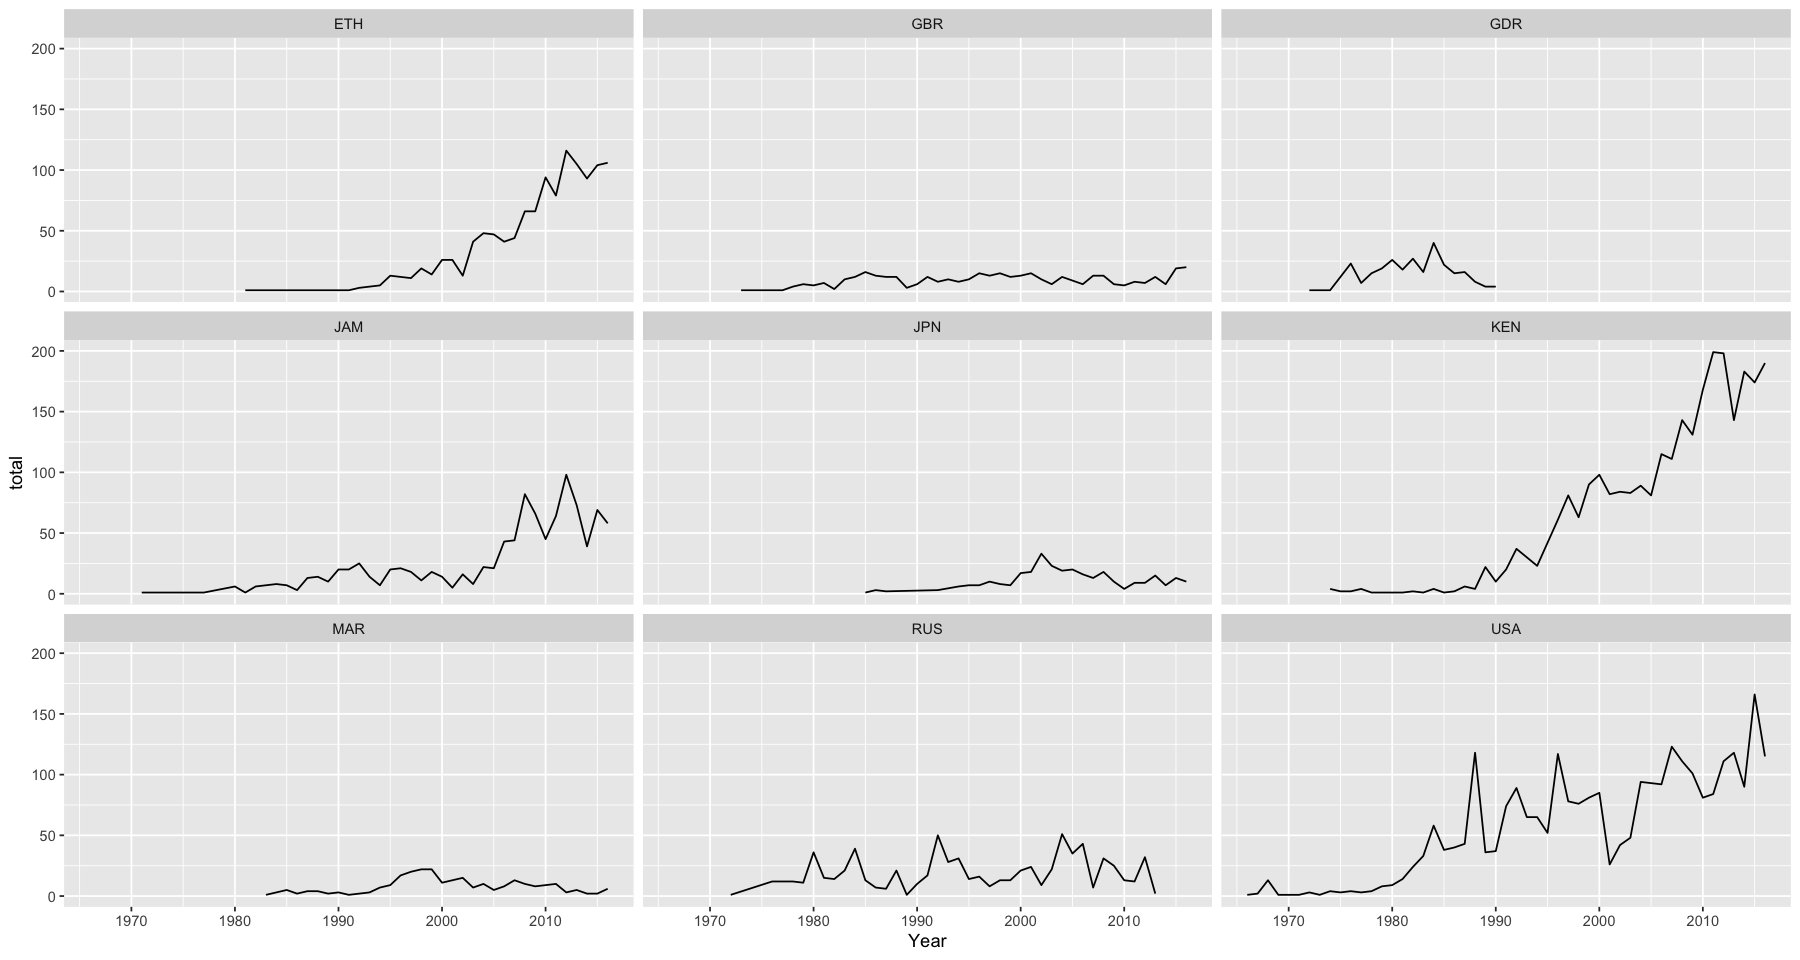

In [941]:
ggplot(data = top_countries_performance_per_year, mapping = aes(x = Year, y = total)) + geom_line(mapping = aes(group = Country)) + 
facet_wrap(~Country, ncol = 3)

In [942]:
performance_country_by_sex <- runners_data |>
group_by(Country,Gender,Year) |>
filter(Place == 1 | Place == 2 | Place == 3, Year <= 2016) |>
count(Gender,sort =  TRUE) |>
rename(total = n) 
top_performance_country_by_sex <- performance_country_by_sex |> filter(Country %in% performance_country_filtered)

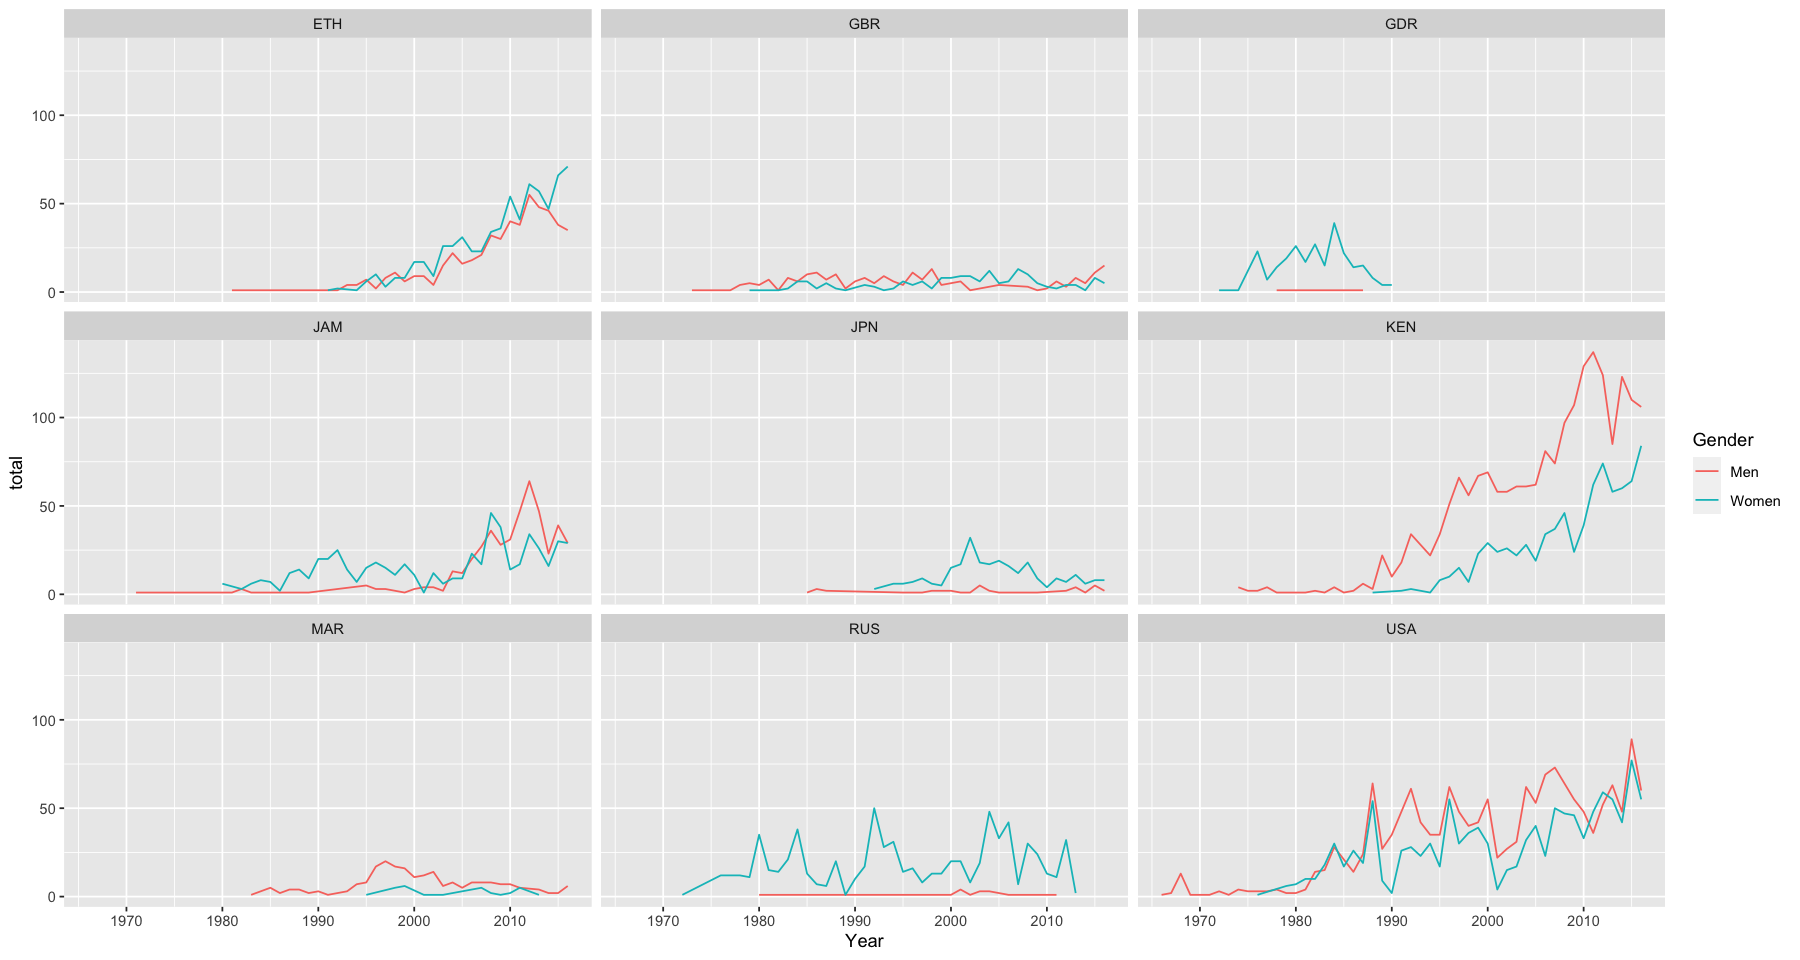

In [943]:
ggplot(data = top_performance_country_by_sex, mapping = aes(x = Year, y = total,color = Gender)) + geom_line() + 
facet_wrap(~Country, ncol = 3) # Gender~Country também1 é uma possibilidade


## Relação entre a idade e velocidade

In [944]:
fastest_time <- runners_data |>
group_by(Time,Age) |>
arrange(Time,sort = TRUE)

temp_list <- c()
temp_list_1 <- c("Age<=20","20<Age<25","25<Age<30","30<Age<35","Age>=35")
 
top_100_fastest_time <- head(fastest_time,100)
temp_list <- append(temp_list,top_100_fastest_time |> filter(Age <= 20) |> nrow())
temp_list <- append(temp_list,top_100_fastest_time |> filter(Age <= 25 & Age >= 20 ) |> nrow())
temp_list <- append(temp_list,top_100_fastest_time |> filter(Age <= 30 & Age >= 25 ) |> nrow())
temp_list <- append(temp_list,top_100_fastest_time |> filter(Age <= 35 & Age >= 30 ) |> nrow())
temp_list <- append(temp_list,top_100_fastest_time |> filter(Age >= 35) |> nrow())

age_top_100_fastest_time <- data.frame(Age = temp_list_1,Total = temp_list)
age_top_100_fastest_time

Age,Total
<chr>,<int>
Age<=20,1
20<Age<25,45
25<Age<30,52
30<Age<35,21
Age>=35,0


## Corredores com a maior quantidade de medalhas

In [945]:
most_medals_men <- runners_men |>
group_by(Name) |>
filter(Place == 1 | Place == 2 | Place == 3) |>
count(Name,sort = TRUE)

head(most_medals_men)

Name,n
<chr>,<int>
Michael Johnson,122
Usain Bolt,107
Asafa Powell,106
LaShawn Merritt,97
Frank Fredericks,81
Justin Gatlin,78


In [946]:
most_medals_women <- runners_women |>
group_by(Name) |>
filter(Place == 1 | Place == 2 | Place == 3) |>
count(Name,sort = TRUE)

head(most_medals_women)

Name,n
<chr>,<int>
Merlene Ottey,174
Gwen Torrence,95
Veronica Campbell-Brown,84
Sanya Richards-Ross,83
Maria Mutola,80
Allyson Felix,79


## Melhores competidores dos 100 metros

In [947]:
head(
runners_men |>
filter(Event == "100 m") |>
filter(Place == 1 | Place == 2 | Place == 3) |>
count(Name,sort = TRUE)
)

,Name,n
,<chr>,<int>
1,Asafa Powell,101
2,Justin Gatlin,57
3,Maurice Greene,57
4,Usain Bolt,52
5,Tyson Gay,42
6,Mike Rodgers,41


In [948]:
head(
runners_women |>
filter(Event == "100 m") |>
filter(Place == 1 | Place == 2 | Place == 3) |>
count(Name,sort = TRUE)
)

,Name,n
,<chr>,<int>
1,Merlene Ottey,85
2,Veronica Campbell-Brown,54
3,Carmelita Jeter,46
4,Gwen Torrence,45
5,Marion Jones,43
6,Shelly-Ann Fraser-Pryce,43


## Melhores competidores das maratonas

In [949]:
head(
runners_men |>
filter(Event == "Marathon") |>
filter(Place == 1 | Place == 2 | Place == 3) |>
count(Name,sort = TRUE, .keep = Time)
,3)

,Name,.keep,n
,<chr>,<chr>,<int>
1,Abel Kirui,02:07:38,2
2,Paul Biwott,02:08:17,2
3,Abdelkader El Mouaziz,02:07:11,1


In [950]:
Abel_Kirui_runner <- subset(runners_data, Name == "Abel Kirui" & Event == "Marathon")

In [951]:
head(
runners_women |>
filter(Event == "Marathon") |>
filter(Place == 1 | Place == 2 | Place == 3) |>
count(Name,sort = TRUE, .keep = Time)
,3)

,Name,.keep,n
,<chr>,<chr>,<int>
1,Aselefech Mergia,02:25:32,2
2,Jelena Prokopcuka,02:24:07,2
3,Mare Dibaba,02:19:52,2


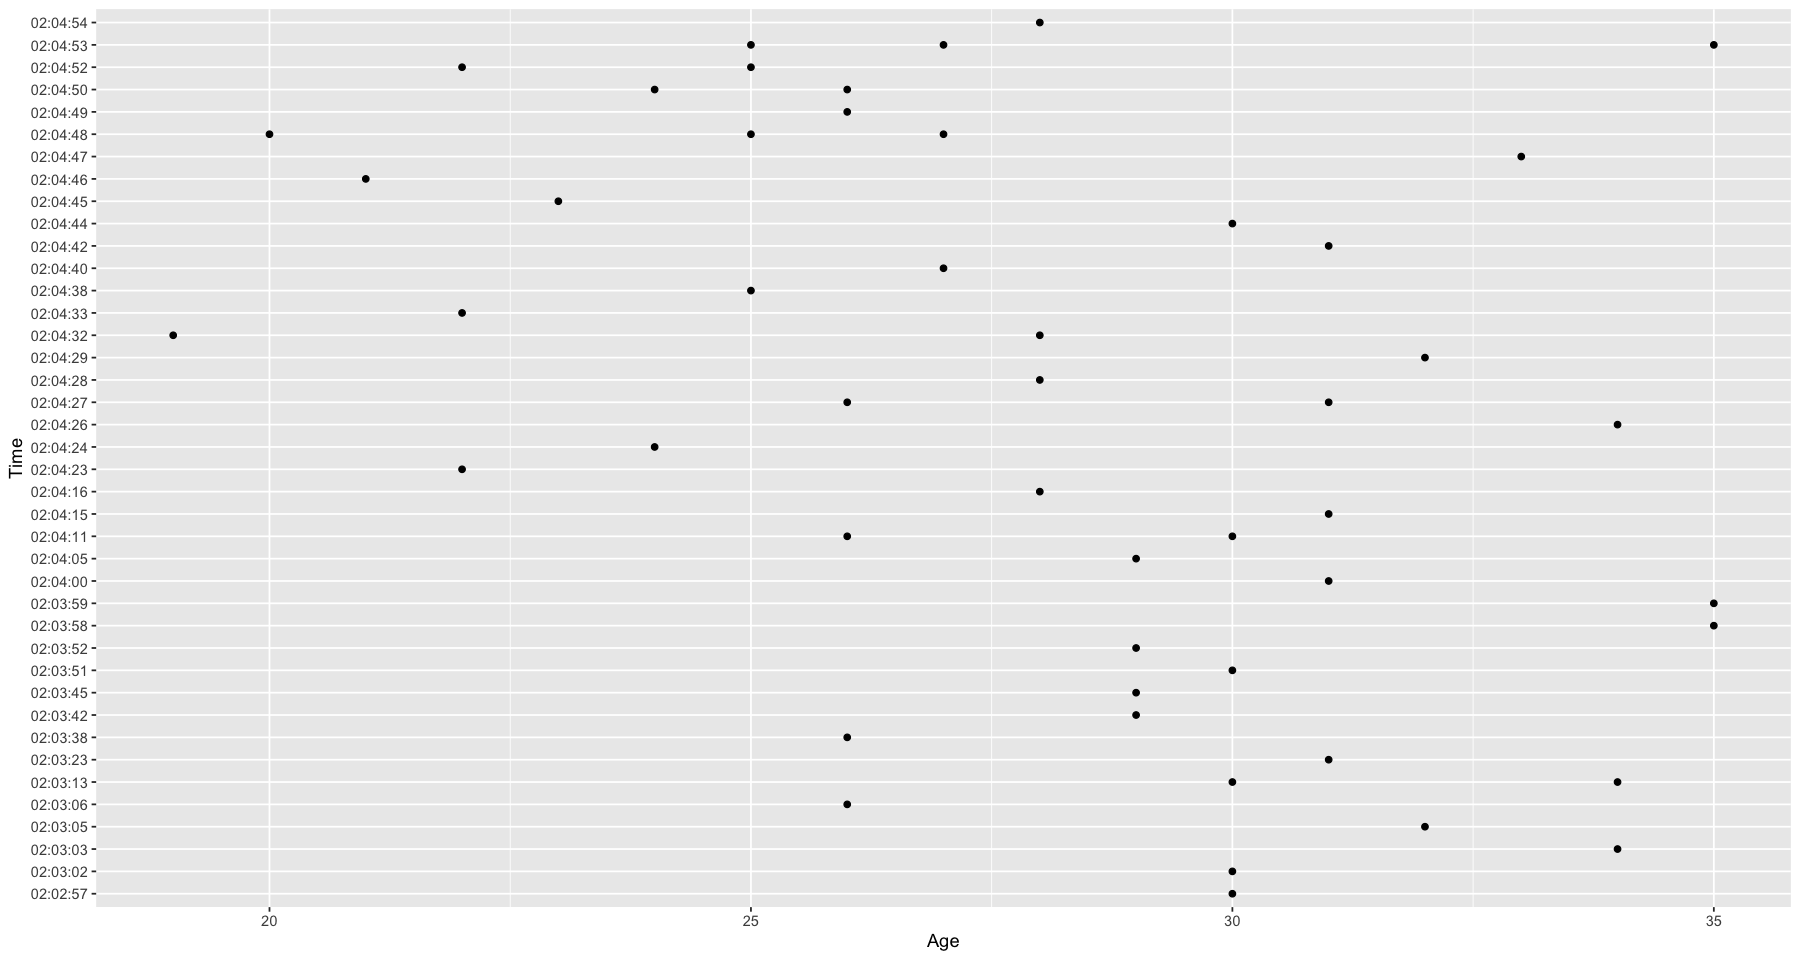

In [954]:
fastest_time_marathon_men <- runners_men |>
filter(Event == "Marathon") |>
arrange(Time)
top_50_fastest_time_marathon_men <- head(fastest_time_marathon_men,50)

ggplot(data = top_50_fastest_time_marathon_men, mapping = aes(x = Age, Time)) + geom_point(mapping = aes(group = Name))+ 
scale_x_continuous(breaks = seq(20,40,5)) 

Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


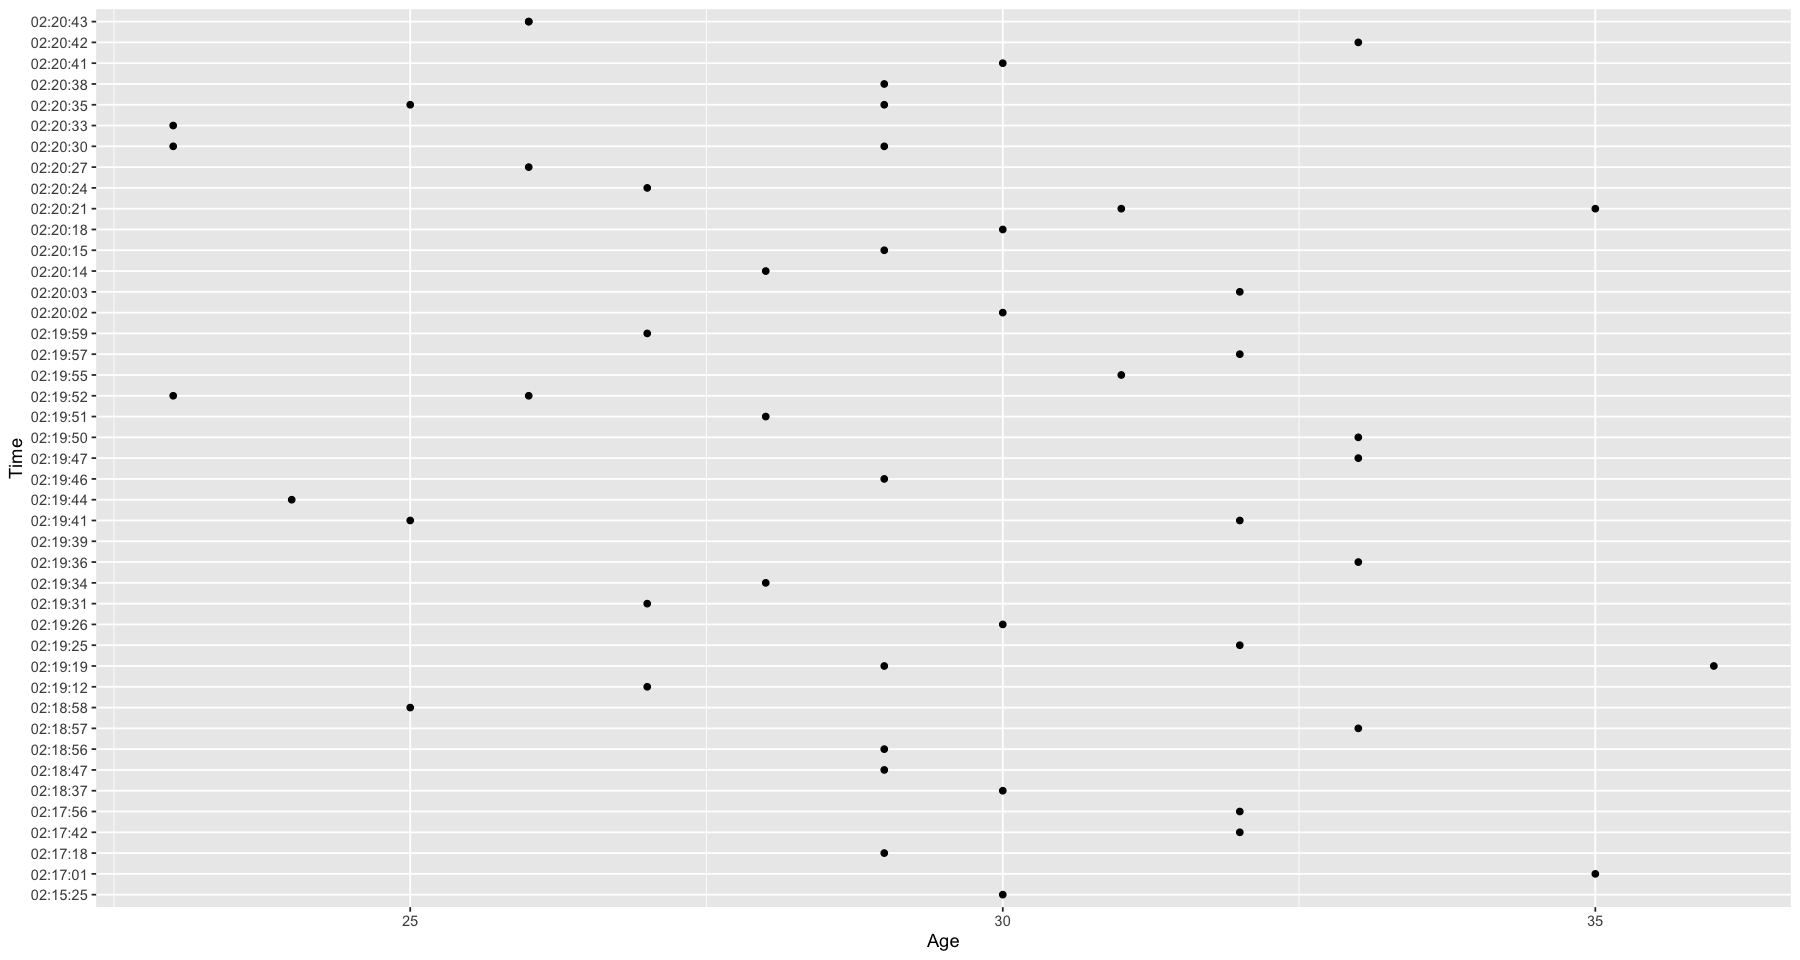

In [956]:
fastest_time_marathon_women <- runners_women |>
filter(Event == "Marathon") |>
arrange(Time)
top_50_fastest_time_marathon_women <- head(fastest_time_marathon_women,50)

ggplot(data = top_50_fastest_time_marathon_women, mapping = aes(x = Age, Time)) + geom_point(mapping = aes(group = Name))+ 
scale_x_continuous(breaks = seq(20,40,5)) 

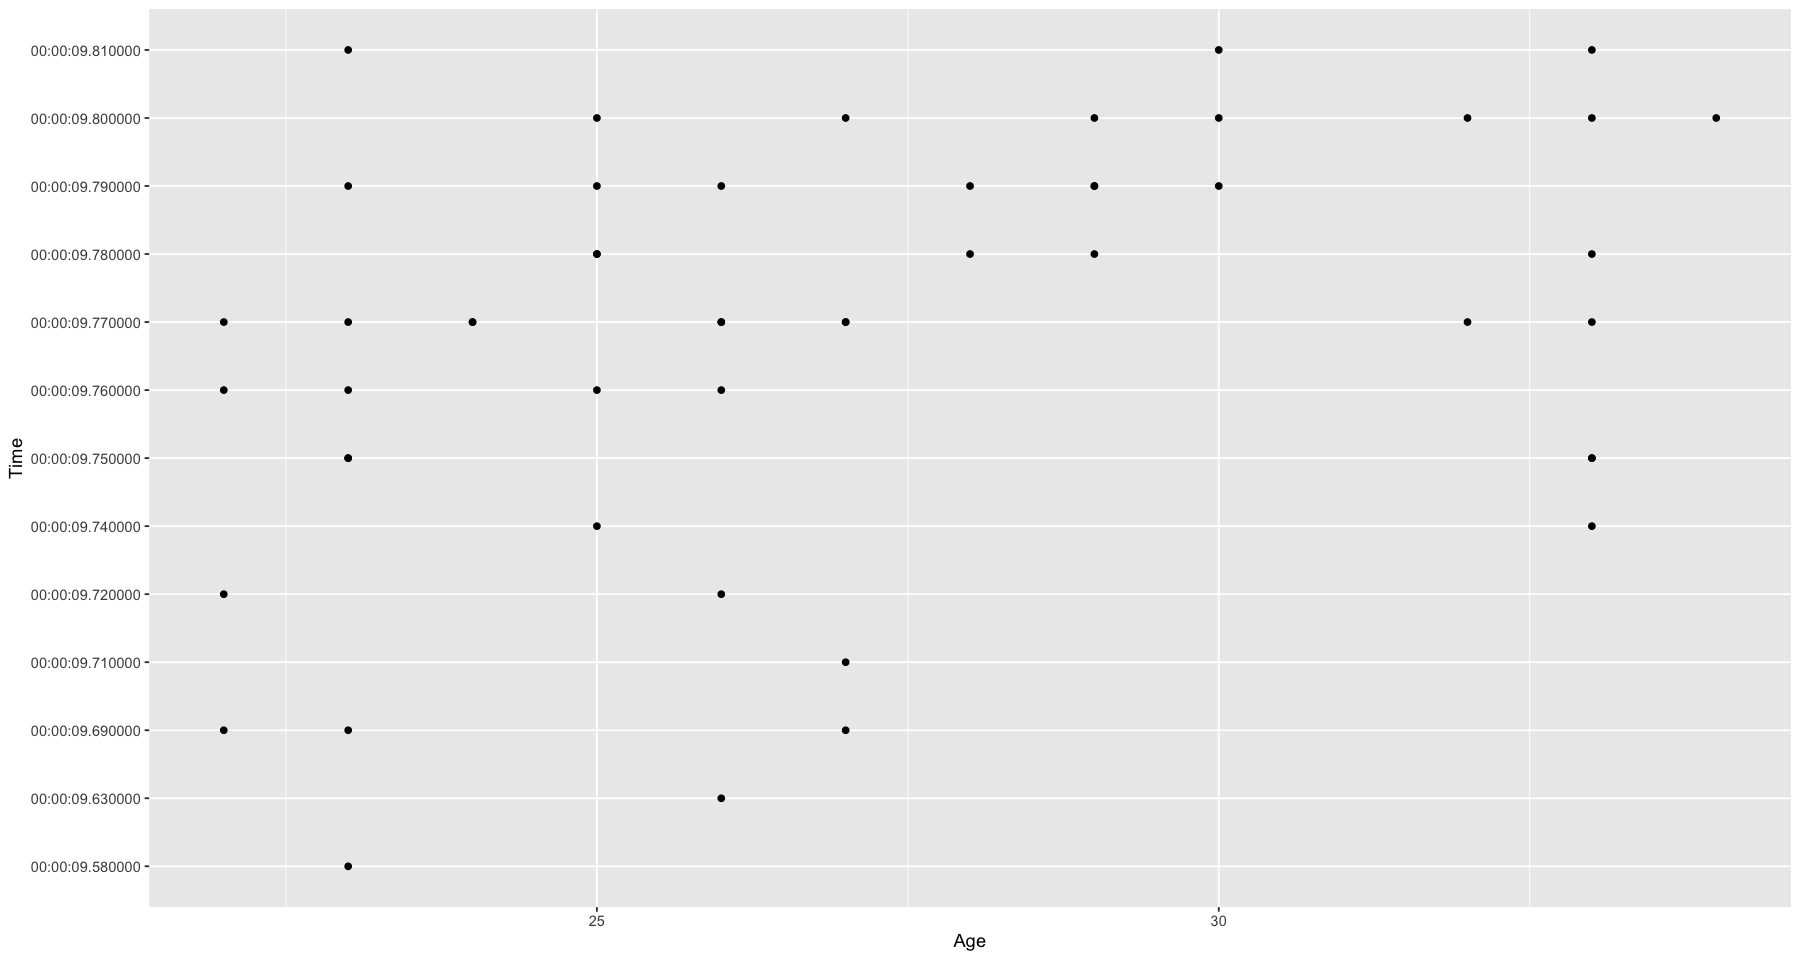

In [957]:
fastest_time_100m_men <- runners_men |>
filter(Event == "100 m") |>
arrange(Time)
top_50_fastest_time_100m_men <- head(fastest_time_100m_men,50)

ggplot(data = top_50_fastest_time_100m_men, mapping = aes(x = Age, Time)) + geom_point(mapping = aes(group = Name))+ 
scale_x_continuous(breaks = seq(20,40,5)) 

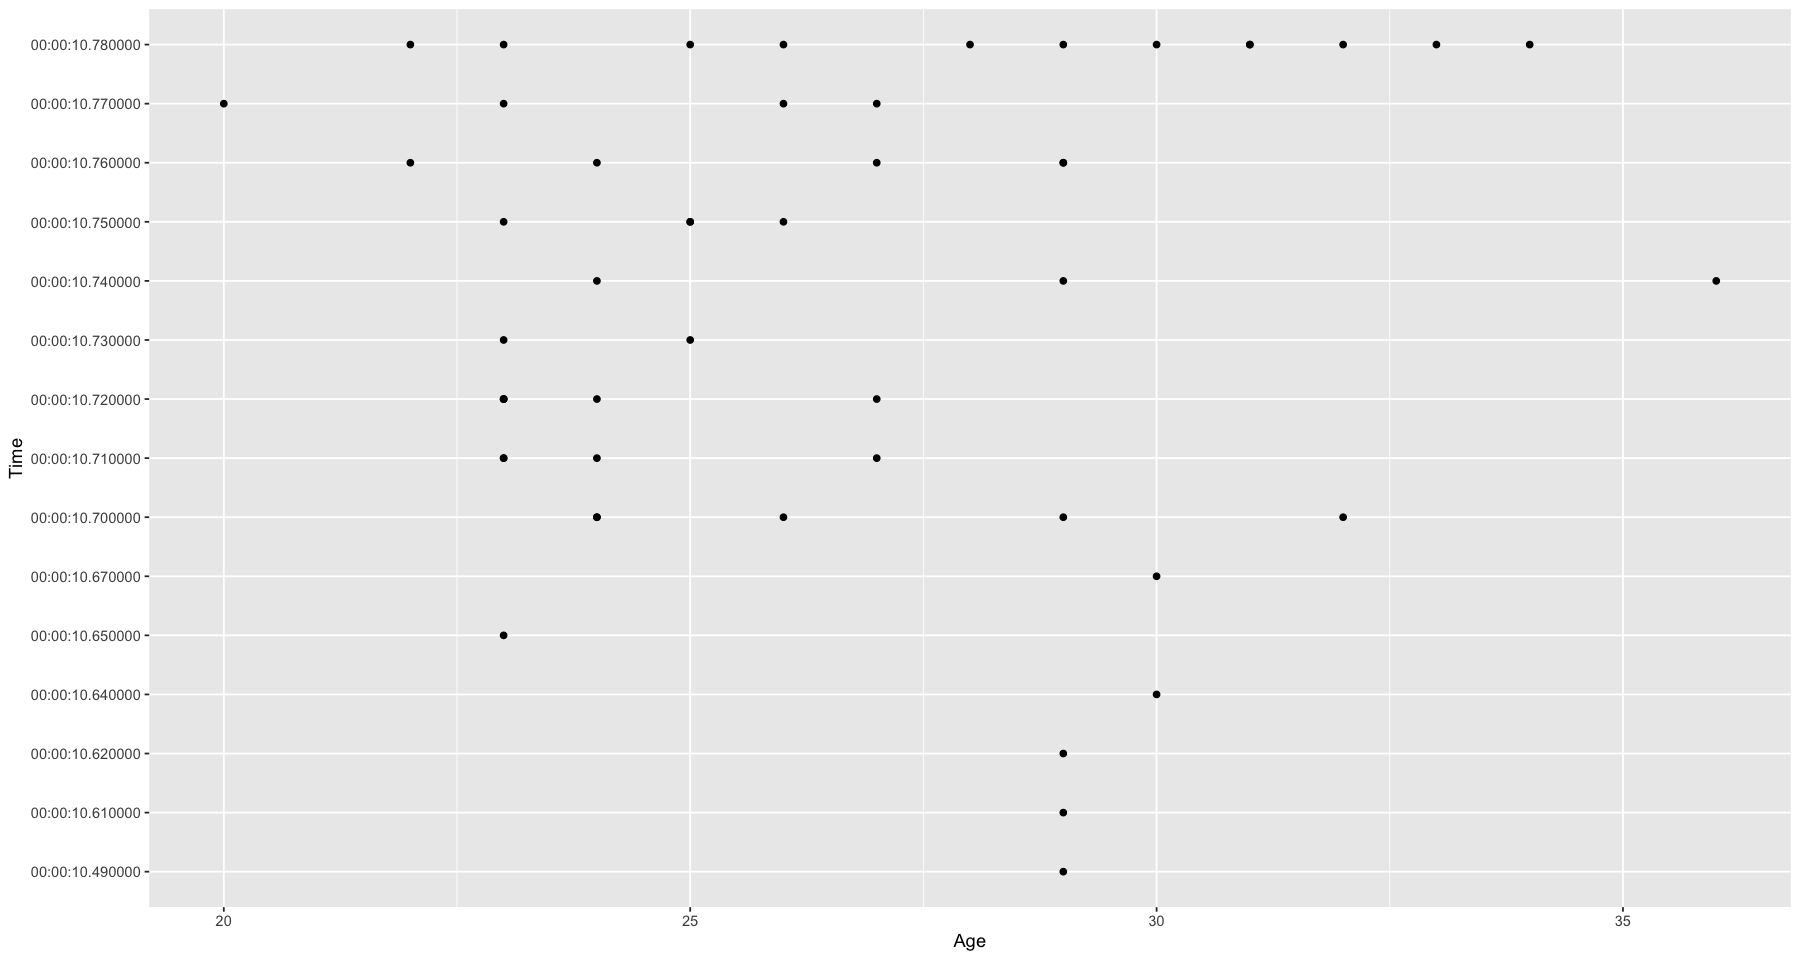

In [959]:
fastest_time_100m_women <- runners_women |>
filter(Event == "100 m") |>
arrange(Time)
top_50_fastest_time_100m_women<- head(fastest_time_100m_women,50)

ggplot(data = top_50_fastest_time_100m_women, mapping = aes(x = Age, Time)) + geom_point(mapping = aes(group = Name))+ 
scale_x_continuous(breaks = seq(20,40,5))